# AWS Elasticache Redis vs Valkey 性能比較分析

このノートブックでは、ベンチマークテストの結果を分析し、RedisとValkeyの性能差を視覚化します。

In [1]:
# 必要なライブラリをインポート
import os
import json
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# グラフのスタイル設定
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 結果ファイルの読み込み

ベンチマークの結果ファイルを読み込みます。以下のセルでは、最新の結果ファイルを自動的に検出して読み込みます。

In [2]:
# 結果ディレクトリのパス
results_dir = '../results'

# 最新のキー/バリュー操作ベンチマーク結果を取得
kv_redis_files = sorted(glob.glob(os.path.join(results_dir, 'kv_redis_*.json')))
kv_valkey_files = sorted(glob.glob(os.path.join(results_dir, 'kv_valkey_*.json')))

# 最新のデータ構造操作ベンチマーク結果を取得
ds_redis_files = sorted(glob.glob(os.path.join(results_dir, 'ds_redis_*.json')))
ds_valkey_files = sorted(glob.glob(os.path.join(results_dir, 'ds_valkey_*.json')))

# 結果ファイルの一覧を表示
print("キー/バリュー操作ベンチマーク結果:")
for i, (redis_file, valkey_file) in enumerate(zip(kv_redis_files, kv_valkey_files)):
    print(f"{i+1}. Redis: {os.path.basename(redis_file)}, Valkey: {os.path.basename(valkey_file)}")

print("\nデータ構造操作ベンチマーク結果:")
for i, (redis_file, valkey_file) in enumerate(zip(ds_redis_files, ds_valkey_files)):
    print(f"{i+1}. Redis: {os.path.basename(redis_file)}, Valkey: {os.path.basename(valkey_file)}")

キー/バリュー操作ベンチマーク結果:
1. Redis: kv_redis_20250416_004913.json, Valkey: kv_valkey_20250416_004913.json
2. Redis: kv_redis_20250416_005733.json, Valkey: kv_valkey_20250416_005733.json
3. Redis: kv_redis_20250416_011912.json, Valkey: kv_valkey_20250416_011912.json
4. Redis: kv_redis_20250416_013417.json, Valkey: kv_valkey_20250416_013417.json
5. Redis: kv_redis_20250416_022755.json, Valkey: kv_valkey_20250416_022755.json

データ構造操作ベンチマーク結果:
1. Redis: ds_redis_20250416_004913.json, Valkey: ds_valkey_20250416_004913.json
2. Redis: ds_redis_20250416_005733.json, Valkey: ds_valkey_20250416_005733.json
3. Redis: ds_redis_20250416_011912.json, Valkey: ds_valkey_20250416_011912.json
4. Redis: ds_redis_20250416_013417.json, Valkey: ds_valkey_20250416_013417.json
5. Redis: ds_redis_20250416_022755.json, Valkey: ds_valkey_20250416_022755.json


In [3]:
# 分析する結果ファイルを選択
# デフォルトでは最新のファイルを使用
kv_redis_file = kv_redis_files[-1] if kv_redis_files else None
kv_valkey_file = kv_valkey_files[-1] if kv_valkey_files else None
ds_redis_file = ds_redis_files[-1] if ds_redis_files else None
ds_valkey_file = ds_valkey_files[-1] if ds_valkey_files else None

# 選択したファイルを表示
print("選択したファイル:")
print(f"キー/バリュー Redis: {os.path.basename(kv_redis_file) if kv_redis_file else 'なし'}")
print(f"キー/バリュー Valkey: {os.path.basename(kv_valkey_file) if kv_valkey_file else 'なし'}")
print(f"データ構造 Redis: {os.path.basename(ds_redis_file) if ds_redis_file else 'なし'}")
print(f"データ構造 Valkey: {os.path.basename(ds_valkey_file) if ds_valkey_file else 'なし'}")

選択したファイル:
キー/バリュー Redis: kv_redis_20250416_022755.json
キー/バリュー Valkey: kv_valkey_20250416_022755.json
データ構造 Redis: ds_redis_20250416_022755.json
データ構造 Valkey: ds_valkey_20250416_022755.json


In [4]:
# 結果ファイルを読み込む関数
def load_result_file(file_path):
    if file_path and os.path.exists(file_path):
        with open(file_path, 'r') as f:
            return json.load(f)
    return None

# 結果を読み込み
kv_redis_result = load_result_file(kv_redis_file)
kv_valkey_result = load_result_file(kv_valkey_file)
ds_redis_result = load_result_file(ds_redis_file)
ds_valkey_result = load_result_file(ds_valkey_file)

## キー/バリュー操作ベンチマークの分析

キー/バリュー操作（GET/SET）のベンチマーク結果を分析します。

ベンチマーク設定:
値サイズ: 1024 バイト
キー数: 10000
スレッド数: 10
スレッドあたりの操作数: 10000
読み取り/書き込み比率: 0.8

全体の比較:


,メトリクス,Redis,Valkey,差異 (%)
0,スループット (ops/sec),4577.205161,4890.676507,6.848532
1,平均レイテンシ (ms),2.143635,2.007396,6.355508
2,中央値レイテンシ (ms),1.760006,1.757622,0.135465
3,p95レイテンシ (ms),3.397703,2.609015,23.212406
4,p99レイテンシ (ms),9.930849,7.191181,27.587449



GET操作の比較:


,メトリクス,Redis,Valkey,差異 (%)
0,スループット (ops/sec),3671.284716,3914.937637,6.636721
1,平均レイテンシ (ms),2.142281,2.004044,6.452819
2,p95レイテンシ (ms),3.391027,2.598286,23.377628



SET操作の比較:


,メトリクス,Redis,Valkey,差異 (%)
0,スループット (ops/sec),905.920446,975.738870,7.706905
1,平均レイテンシ (ms),2.149119,2.020845,5.968687
2,p95レイテンシ (ms),3.431082,2.653360,22.666945


/tmp/ipykernel_840171/1345215848.py:160: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_840171/1345215848.py:160: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_840171/1345215848.py:160: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_840171/1345215848.py:160: UserWarning: Glyph 25805 (\N{CJK UNIFIED IDEOGRAPH-64CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_840171/1345215848.py:160: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_840171/1345215848.py:160: UserWarning: Glyph 31186 (\N{CJK UNIFIED IDEOGRAPH-79D2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_840171/1345215848.py:160: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing fro

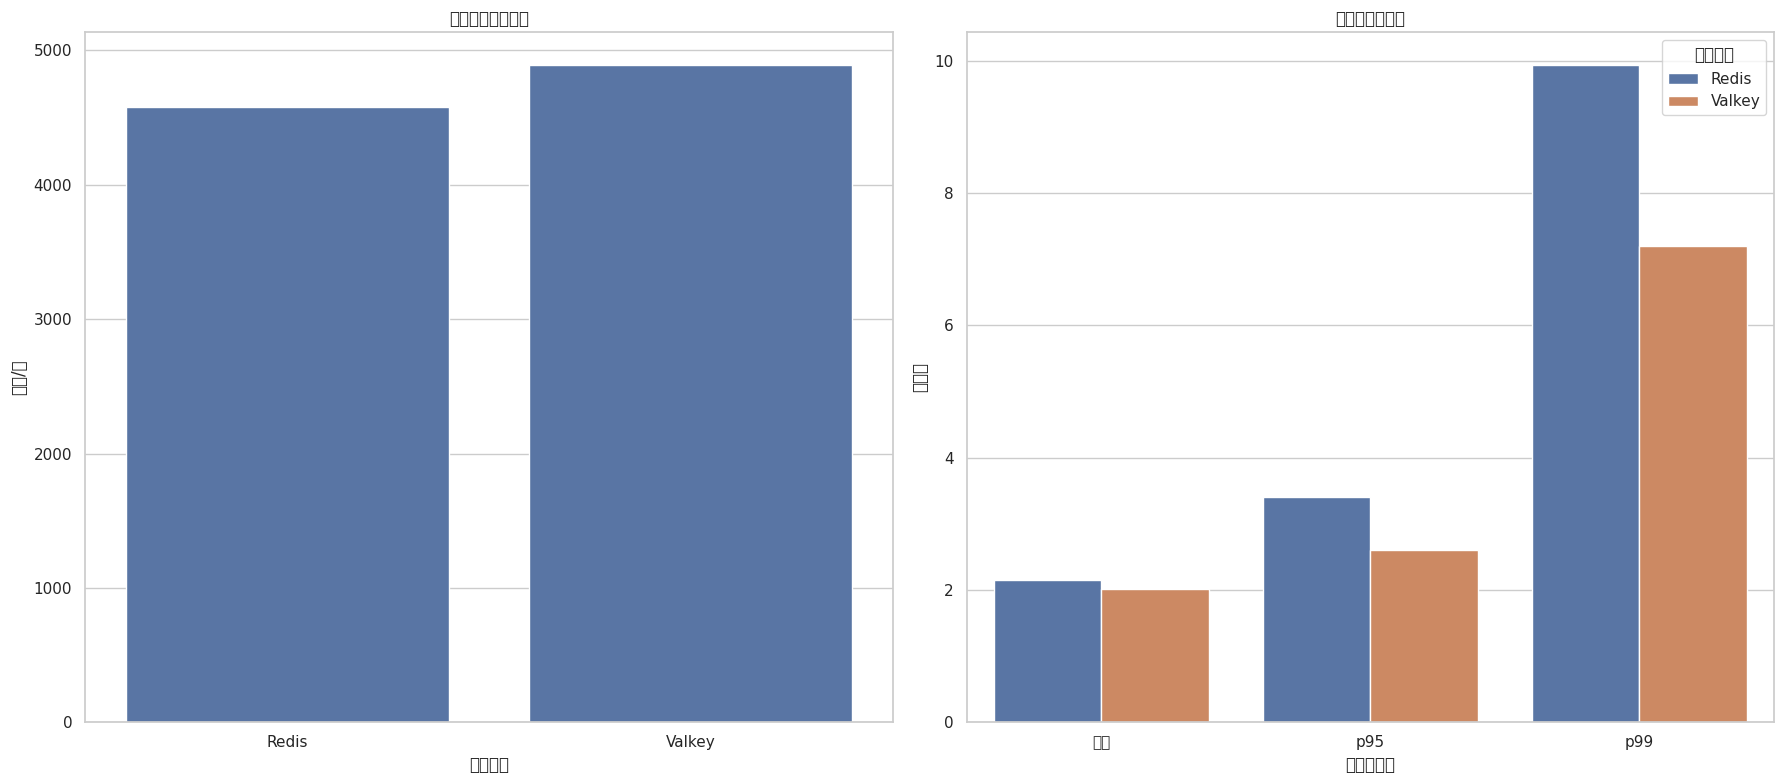

/tmp/ipykernel_840171/1345215848.py:223: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_840171/1345215848.py:223: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_840171/1345215848.py:223: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_840171/1345215848.py:223: UserWarning: Glyph 25805 (\N{CJK UNIFIED IDEOGRAPH-64CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_840171/1345215848.py:223: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_840171/1345215848.py:223: UserWarning: Glyph 31186 (\N{CJK UNIFIED IDEOGRAPH-79D2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_840171/1345215848.py:223: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing fro

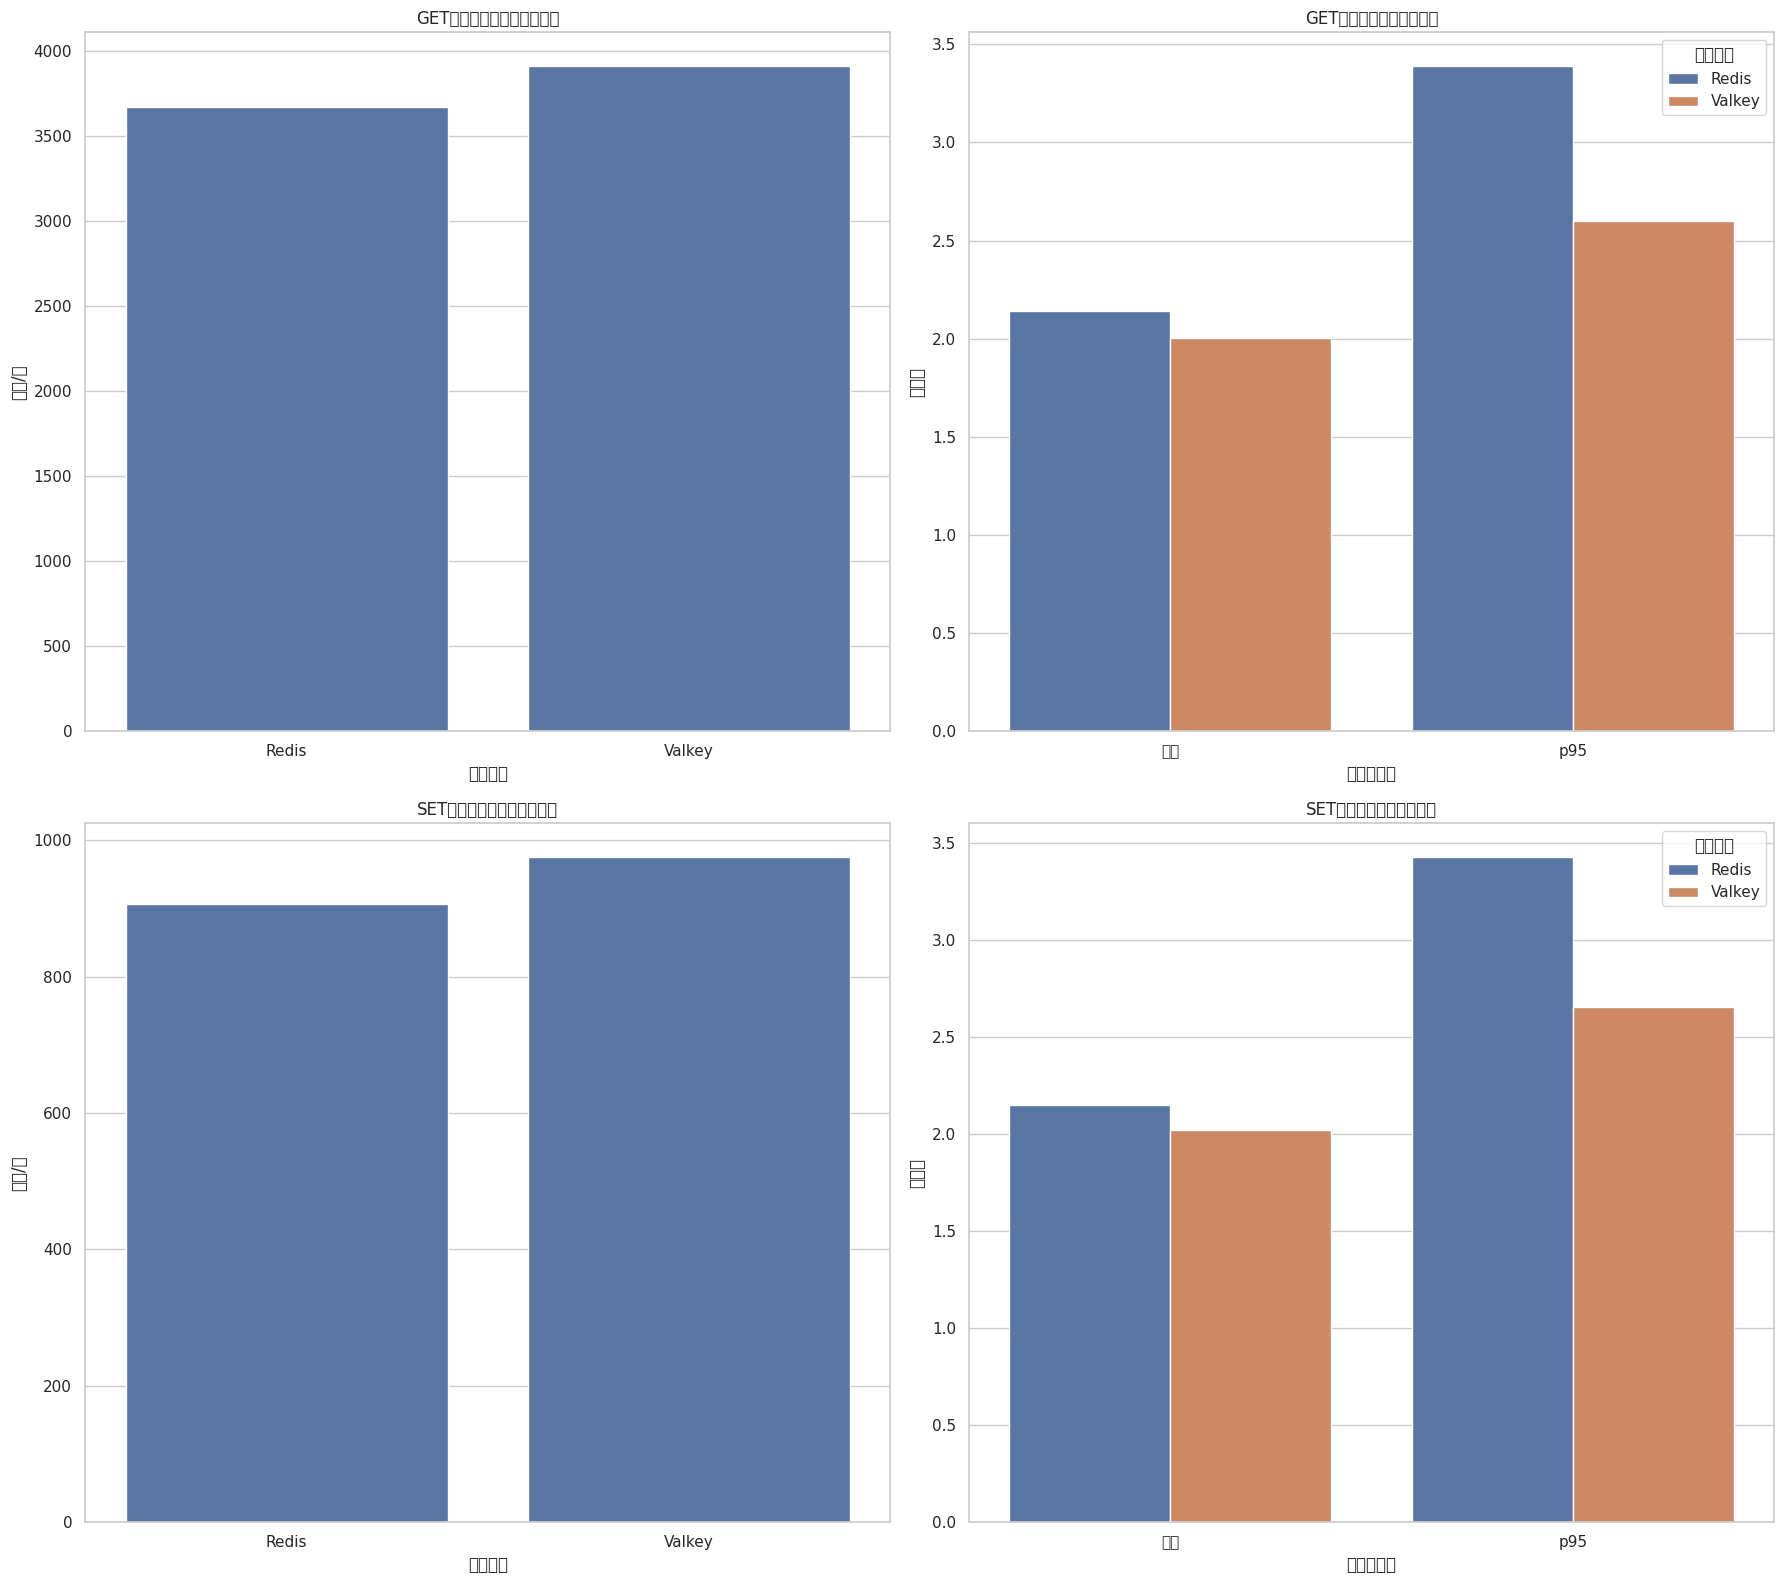

In [5]:
def analyze_kv_benchmark(redis_result, valkey_result):
    if not redis_result or not valkey_result:
        print("キー/バリュー操作ベンチマークの結果が見つかりません。")
        return
    
    # 設定情報を表示
    redis_config = redis_result['config']
    valkey_config = valkey_result['config']
    
    print("ベンチマーク設定:")
    print(f"値サイズ: {redis_config['value_size']} バイト")
    print(f"キー数: {redis_config['num_keys']}")
    print(f"スレッド数: {redis_config['num_threads']}")
    print(f"スレッドあたりの操作数: {redis_config['operations_per_thread']}")
    print(f"読み取り/書き込み比率: {redis_config['read_write_ratio']}")
    
    # 基本的な統計情報を抽出
    redis_stats = redis_result['stats']
    valkey_stats = valkey_result['stats']
    
    # 比較データフレームを作成
    comparison_data = {
        'メトリクス': [
            'スループット (ops/sec)',
            '平均レイテンシ (ms)',
            '中央値レイテンシ (ms)',
            'p95レイテンシ (ms)',
            'p99レイテンシ (ms)'
        ],
        'Redis': [
            redis_stats['operations_per_sec'],
            redis_stats['all_stats']['avg'],
            redis_stats['all_stats']['median'],
            redis_stats['all_stats']['p95'],
            redis_stats['all_stats']['p99']
        ],
        'Valkey': [
            valkey_stats['operations_per_sec'],
            valkey_stats['all_stats']['avg'],
            valkey_stats['all_stats']['median'],
            valkey_stats['all_stats']['p95'],
            valkey_stats['all_stats']['p99']
        ]
    }
    
    # 差異を計算
    comparison_data['差異 (%)'] = [
        (valkey_stats['operations_per_sec'] - redis_stats['operations_per_sec']) / redis_stats['operations_per_sec'] * 100,
        (redis_stats['all_stats']['avg'] - valkey_stats['all_stats']['avg']) / redis_stats['all_stats']['avg'] * 100,
        (redis_stats['all_stats']['median'] - valkey_stats['all_stats']['median']) / redis_stats['all_stats']['median'] * 100,
        (redis_stats['all_stats']['p95'] - valkey_stats['all_stats']['p95']) / redis_stats['all_stats']['p95'] * 100,
        (redis_stats['all_stats']['p99'] - valkey_stats['all_stats']['p99']) / redis_stats['all_stats']['p99'] * 100
    ]
    
    # データフレームを作成
    df = pd.DataFrame(comparison_data)
    
    # 結果を表示
    print("\n全体の比較:")
    display(df)
    
    # 操作タイプ別の比較（GET vs SET）
    if 'get_stats' in redis_stats and 'set_stats' in redis_stats:
        # GET操作の比較
        get_comparison = {
            'メトリクス': [
                'スループット (ops/sec)',
                '平均レイテンシ (ms)',
                'p95レイテンシ (ms)'
            ],
            'Redis': [
                redis_stats['get_stats']['throughput'],
                redis_stats['get_stats']['avg'],
                redis_stats['get_stats']['p95']
            ],
            'Valkey': [
                valkey_stats['get_stats']['throughput'],
                valkey_stats['get_stats']['avg'],
                valkey_stats['get_stats']['p95']
            ]
        }
        
        # 差異を計算
        get_comparison['差異 (%)'] = [
            (valkey_stats['get_stats']['throughput'] - redis_stats['get_stats']['throughput']) / redis_stats['get_stats']['throughput'] * 100,
            (redis_stats['get_stats']['avg'] - valkey_stats['get_stats']['avg']) / redis_stats['get_stats']['avg'] * 100,
            (redis_stats['get_stats']['p95'] - valkey_stats['get_stats']['p95']) / redis_stats['get_stats']['p95'] * 100
        ]
        
        # SET操作の比較
        set_comparison = {
            'メトリクス': [
                'スループット (ops/sec)',
                '平均レイテンシ (ms)',
                'p95レイテンシ (ms)'
            ],
            'Redis': [
                redis_stats['set_stats']['throughput'],
                redis_stats['set_stats']['avg'],
                redis_stats['set_stats']['p95']
            ],
            'Valkey': [
                valkey_stats['set_stats']['throughput'],
                valkey_stats['set_stats']['avg'],
                valkey_stats['set_stats']['p95']
            ]
        }
        
        # 差異を計算
        set_comparison['差異 (%)'] = [
            (valkey_stats['set_stats']['throughput'] - redis_stats['set_stats']['throughput']) / redis_stats['set_stats']['throughput'] * 100,
            (redis_stats['set_stats']['avg'] - valkey_stats['set_stats']['avg']) / redis_stats['set_stats']['avg'] * 100,
            (redis_stats['set_stats']['p95'] - valkey_stats['set_stats']['p95']) / redis_stats['set_stats']['p95'] * 100
        ]
        
        # データフレームを作成
        get_df = pd.DataFrame(get_comparison)
        set_df = pd.DataFrame(set_comparison)
        
        # 結果を表示
        print("\nGET操作の比較:")
        display(get_df)
        
        print("\nSET操作の比較:")
        display(set_df)
    
    # グラフの作成
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
    # スループットの比較
    throughput_data = {
        'エンジン': ['Redis', 'Valkey'],
        'スループット (ops/sec)': [redis_stats['operations_per_sec'], valkey_stats['operations_per_sec']]
    }
    throughput_df = pd.DataFrame(throughput_data)
    
    sns.barplot(x='エンジン', y='スループット (ops/sec)', data=throughput_df, ax=axes[0])
    axes[0].set_title('スループット比較')
    axes[0].set_ylabel('操作/秒')
    
    # レイテンシの比較
    latency_data = {
        'エンジン': ['Redis', 'Redis', 'Redis', 'Valkey', 'Valkey', 'Valkey'],
        'メトリクス': ['平均', 'p95', 'p99', '平均', 'p95', 'p99'],
        'レイテンシ (ms)': [
            redis_stats['all_stats']['avg'],
            redis_stats['all_stats']['p95'],
            redis_stats['all_stats']['p99'],
            valkey_stats['all_stats']['avg'],
            valkey_stats['all_stats']['p95'],
            valkey_stats['all_stats']['p99']
        ]
    }
    latency_df = pd.DataFrame(latency_data)
    
    sns.barplot(x='メトリクス', y='レイテンシ (ms)', hue='エンジン', data=latency_df, ax=axes[1])
    axes[1].set_title('レイテンシ比較')
    axes[1].set_ylabel('ミリ秒')
    
    plt.tight_layout()
    plt.show()
    
    # GET/SET操作別のグラフ
    if 'get_stats' in redis_stats and 'set_stats' in redis_stats:
        fig, axes = plt.subplots(2, 2, figsize=(18, 16))
        
        # GET操作のスループット比較
        get_throughput_data = {
            'エンジン': ['Redis', 'Valkey'],
            'スループット (ops/sec)': [redis_stats['get_stats']['throughput'], valkey_stats['get_stats']['throughput']]
        }
        get_throughput_df = pd.DataFrame(get_throughput_data)
        
        sns.barplot(x='エンジン', y='スループット (ops/sec)', data=get_throughput_df, ax=axes[0, 0])
        axes[0, 0].set_title('GET操作のスループット比較')
        axes[0, 0].set_ylabel('操作/秒')
        
        # GET操作のレイテンシ比較
        get_latency_data = {
            'エンジン': ['Redis', 'Redis', 'Valkey', 'Valkey'],
            'メトリクス': ['平均', 'p95', '平均', 'p95'],
            'レイテンシ (ms)': [
                redis_stats['get_stats']['avg'],
                redis_stats['get_stats']['p95'],
                valkey_stats['get_stats']['avg'],
                valkey_stats['get_stats']['p95']
            ]
        }
        get_latency_df = pd.DataFrame(get_latency_data)
        
        sns.barplot(x='メトリクス', y='レイテンシ (ms)', hue='エンジン', data=get_latency_df, ax=axes[0, 1])
        axes[0, 1].set_title('GET操作のレイテンシ比較')
        axes[0, 1].set_ylabel('ミリ秒')
        
        # SET操作のスループット比較
        set_throughput_data = {
            'エンジン': ['Redis', 'Valkey'],
            'スループット (ops/sec)': [redis_stats['set_stats']['throughput'], valkey_stats['set_stats']['throughput']]
        }
        set_throughput_df = pd.DataFrame(set_throughput_data)
        
        sns.barplot(x='エンジン', y='スループット (ops/sec)', data=set_throughput_df, ax=axes[1, 0])
        axes[1, 0].set_title('SET操作のスループット比較')
        axes[1, 0].set_ylabel('操作/秒')
        
        # SET操作のレイテンシ比較
        set_latency_data = {
            'エンジン': ['Redis', 'Redis', 'Valkey', 'Valkey'],
            'メトリクス': ['平均', 'p95', '平均', 'p95'],
            'レイテンシ (ms)': [
                redis_stats['set_stats']['avg'],
                redis_stats['set_stats']['p95'],
                valkey_stats['set_stats']['avg'],
                valkey_stats['set_stats']['p95']
            ]
        }
        set_latency_df = pd.DataFrame(set_latency_data)
        
        sns.barplot(x='メトリクス', y='レイテンシ (ms)', hue='エンジン', data=set_latency_df, ax=axes[1, 1])
        axes[1, 1].set_title('SET操作のレイテンシ比較')
        axes[1, 1].set_ylabel('ミリ秒')
        
        plt.tight_layout()
        plt.show()

# キー/バリュー操作ベンチマークの分析を実行
if kv_redis_result and kv_valkey_result:
    analyze_kv_benchmark(kv_redis_result, kv_valkey_result)
else:
    print("キー/バリュー操作ベンチマークの結果が見つかりません。")